### 1. Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 significant_genes_report_corrected.csv         TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Bladder_Cancer_(BLCA)'		        TCGA.PCPG.sampleMap_PCPG_clinicalMatrix
 TCGA.BRCA.sampleMap_BRCA_clinicalMatrix        TCGA.SARC.sampleMap_HiSeqV2_PANCAN
 TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	        TCGA.SARC.sampleMap_SARC_clinicalMatrix
'TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)'       TCGA.THYM.sampleMap_HiSeqV2_PANCAN
'TCGA_Kidney_Papillary_Cell_Carcinoma_(KIRP)'   TCGA.THYM.sampleMap_THYM_clinicalMatrix
'TCGA_Melanoma_(SKCM)'			        TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz
 TCGA.MESO.sampleMap_HiSeqV2_PANCAN	        TCGA.UCEC.sampleMap_UCEC_clinicalMatrix
 TCGA.MESO.sampleMap_MESO_clinicalMatrix        TCGA.UCS.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Ocular_melanomas_(UVM)'		        TCGA.UCS.sampleMap_UCS_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.SARC.sampleMap_SARC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.SARC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_SARC_miRNA_HiSeq,_GENOMIC_ID_TCGA_SARC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_SARC_mutation_broad_gene,_GENOMIC_ID_TCGA_SARC_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_SARC_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/SARC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2,_GENOMIC_ID_TCGA_SARC_RPPA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,TCGA-3B-A9HI,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Progressive Disease,68,TCGA-3B-A9HI-F69153,...,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,TCGA-3B-A9HI-01A-11D-A387-09,TCGA-3B-A9HI-01A-11D-A387-09,TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,5E92FA0B-4BB9-4CA9-AB6A-FB9D6A7E3A78
TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,Complete Response,68,TCGA-3B-A9HJ-F69261,...,fba18017-31ec-45f8-9d9e-43b0efa14347,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,fba18017-31ec-45f8-9d9e-43b0efa14347,TCGA-3B-A9HJ-01A-11D-A387-09,TCGA-3B-A9HJ-01A-11D-A387-09,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,fba18017-31ec-45f8-9d9e-43b0efa14347,C181E222-C4EE-496D-914A-019ADB88CEF1
TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,TCGA-3B-A9HL,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,67,NaN,...,44f2c257-7463-4120-a509-217337d8cd45,TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,44f2c257-7463-4120-a509-217337d8cd45,TCGA-3B-A9HL-01A-11D-A387-09,TCGA-3B-A9HL-01A-11D-A387-09,TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,44f2c257-7463-4120-a509-217337d8cd45,EE323E82-A782-4688-858D-509A77EB8FF6
TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,TCGA-3B-A9HO,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Complete Response,75,TCGA-3B-A9HO-F69263,...,9097b71f-9b67-4c9b-acdb-2f399a071ae6,TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,9097b71f-9b67-4c9b-acdb-2f399a071ae6,TCGA-3B-A9HO-01A-11D-A387-09,TCGA-3B-A9HO-01A-11D-A387-09,TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,9097b71f-9b67-4c9b-acdb-2f399a071ae6,NaN
TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,TCGA-3B-A9HP,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,57,NaN,...,94a77467-94d0-4b95-8b99-9ff79227b690,TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,94a77467-94d0-4b95-8b99-9ff79227b690,TCGA-3B-A9HP-01A-11D-A387-09,TCGA-3B-A9HP-01A-11D-A387-09,TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,94a77467-94d0-4b95-8b99-9ff79227b690,NaN


In [5]:
gene_data.head()

,TCGA-FX-A48G-01,TCGA-HB-A3YV-01,TCGA-DX-AATS-01,TCGA-FX-A3NJ-01,TCGA-DX-A1L2-01,TCGA-3B-A9HX-01,TCGA-WK-A8XX-01,TCGA-DX-A3LS-01,TCGA-DX-A3UD-01,TCGA-3B-A9I0-01,...,TCGA-DX-A3LT-01,TCGA-DX-A48R-01,TCGA-DX-AB35-01,TCGA-DX-A48J-01,TCGA-DX-AB37-01,TCGA-DX-A8BX-01,TCGA-K1-A6RT-01,TCGA-Z4-A9VC-01,TCGA-HS-A5NA-01,TCGA-FX-A3RE-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-2.275792,0.650708,0.337808,1.565708,0.848208,-0.143992,1.922608,-0.508792,2.669308,1.967408,...,0.445208,1.088508,1.097308,2.094108,0.503608,-0.010292,1.260308,-1.042392,-0.257392,-0.976392
HIF3A,2.965374,6.638274,0.536774,3.164474,3.230874,2.238474,-0.248226,0.973474,0.421674,0.447674,...,0.264374,6.293274,4.884874,4.266974,1.071074,0.128874,-0.363126,2.944374,1.735474,2.512274
RNF17,-0.531035,-0.531035,1.014765,-0.531035,-0.531035,-0.531035,1.215565,-0.531035,-0.531035,2.175565,...,-0.531035,-0.133135,-0.531035,-0.531035,-0.531035,-0.531035,3.331065,-0.531035,-0.531035,-0.531035
RNF10,0.137328,0.034528,1.062828,0.236428,-0.514772,-0.109972,0.126528,-0.248872,-0.356272,-0.156672,...,0.003628,-0.749472,0.370528,-0.031872,0.027928,1.899128,0.825728,-0.038972,-0.128472,0.087928
RNF11,-2.430278,1.454722,0.266322,0.942822,0.295222,0.323222,0.131922,0.529222,-0.895478,-0.450778,...,0.187822,0.520022,-0.256678,0.711222,-0.440078,-0.169878,0.627922,0.063822,0.089222,-0.506778


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'sarcoma'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 105 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,TCGA-3B-A9HI,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Progressive Disease,68,TCGA-3B-A9HI-F69153,...,0.619022,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388
TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,Complete Response,68,TCGA-3B-A9HJ-F69261,...,-0.748878,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688
TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,TCGA-3B-A9HL,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,67,NaN,...,-0.748878,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388
TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,TCGA-3B-A9HO,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Complete Response,75,TCGA-3B-A9HO-F69263,...,-0.748878,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688
TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,TCGA-3B-A9HP,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,57,NaN,...,0.830322,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,90.0,0.124708,1.940674,-0.531035,-0.411872,0.021822,-0.51851,-0.578694,1.404154,-0.423399,...,0.619022,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388
TCGA-3B-A9HJ-01,90.0,-0.341092,-0.982226,-0.531035,0.046928,-0.812978,-0.21891,-0.563694,3.296654,0.240601,...,-0.748878,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688
TCGA-3B-A9HL-01,80.0,0.724908,2.713874,-0.531035,0.177128,0.515622,-0.02201,-0.400294,0.208754,-0.423399,...,-0.748878,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388
TCGA-3B-A9HO-01,60.0,0.864508,-0.275326,-0.531035,0.193828,-0.337478,0.37179,-0.445594,0.379054,-0.423399,...,-0.748878,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688
TCGA-3B-A9HP-01,60.0,1.233008,2.502774,-0.531035,-0.146172,-0.235878,-0.70531,-0.404594,2.041754,-0.423399,...,0.830322,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

<ipython-input-9-5d3c2de001cb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)


,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,sarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,90.0,0.124708,1.940674,-0.531035,-0.411872,0.021822,-0.51851,-0.578694,1.404154,-0.423399,...,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388,1
TCGA-3B-A9HJ-01,90.0,-0.341092,-0.982226,-0.531035,0.046928,-0.812978,-0.21891,-0.563694,3.296654,0.240601,...,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688,1
TCGA-3B-A9HL-01,80.0,0.724908,2.713874,-0.531035,0.177128,0.515622,-0.02201,-0.400294,0.208754,-0.423399,...,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388,1
TCGA-3B-A9HO-01,60.0,0.864508,-0.275326,-0.531035,0.193828,-0.337478,0.37179,-0.445594,0.379054,-0.423399,...,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688,1
TCGA-3B-A9HP-01,60.0,1.233008,2.502774,-0.531035,-0.146172,-0.235878,-0.70531,-0.404594,2.041754,-0.423399,...,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912,1


### 2. Preliminary analysis

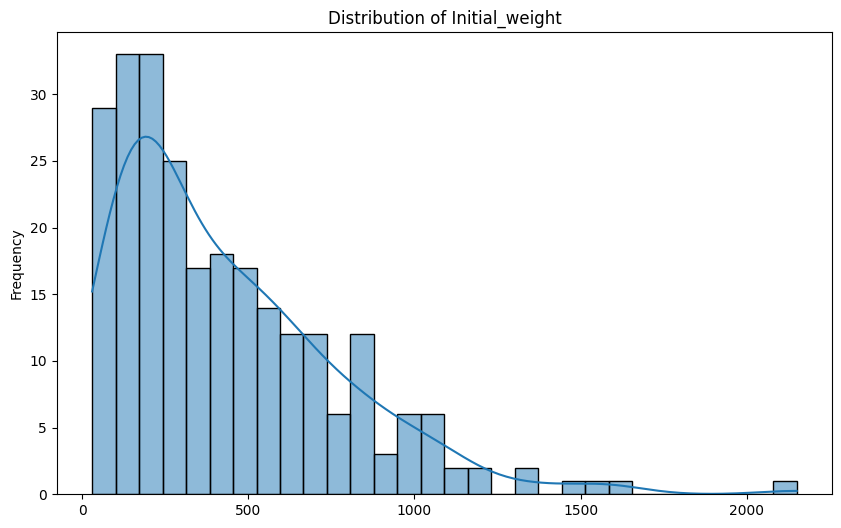

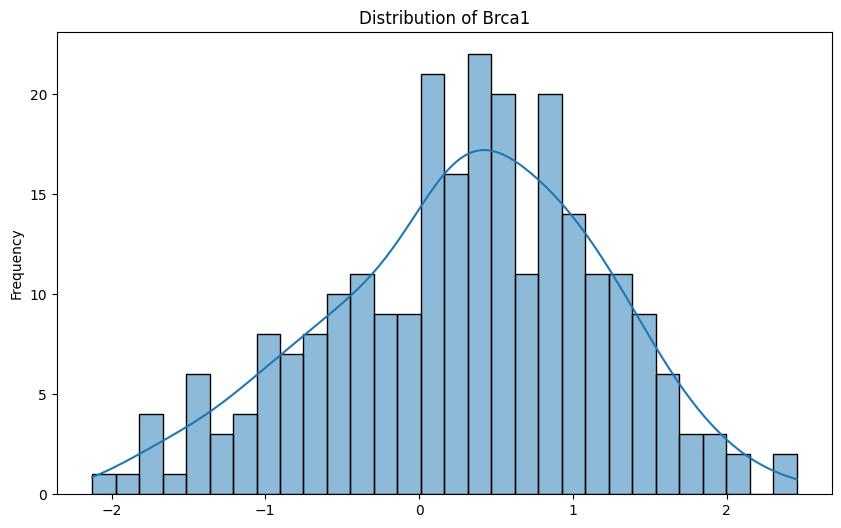

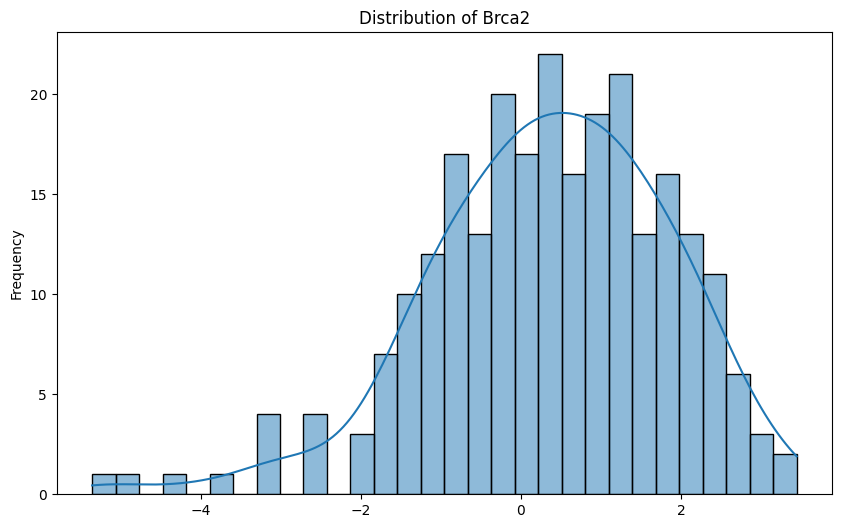

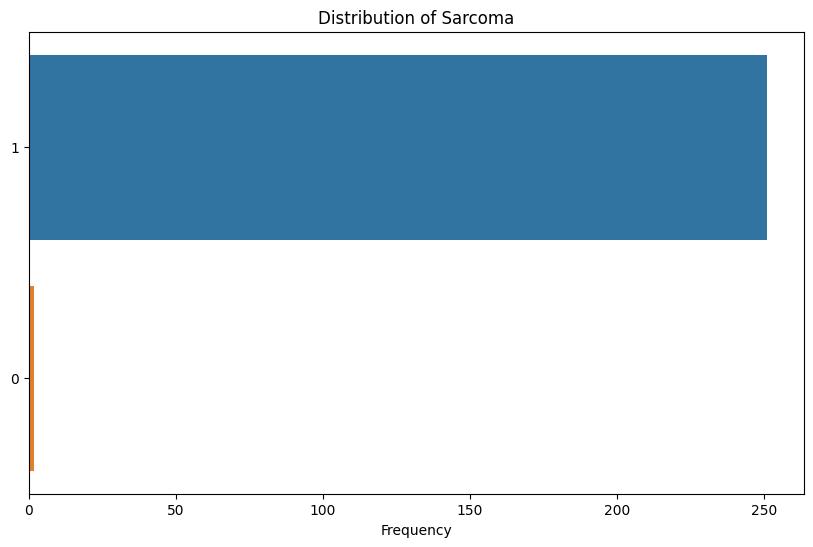

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,sarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,0,0.124708,1.940674,-0.531035,-0.411872,0.021822,-0.51851,-0.578694,1.404154,-0.423399,...,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388,1
TCGA-3B-A9HJ-01,0,-0.341092,-0.982226,-0.531035,0.046928,-0.812978,-0.21891,-0.563694,3.296654,0.240601,...,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688,1
TCGA-3B-A9HL-01,0,0.724908,2.713874,-0.531035,0.177128,0.515622,-0.02201,-0.400294,0.208754,-0.423399,...,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388,1
TCGA-3B-A9HO-01,0,0.864508,-0.275326,-0.531035,0.193828,-0.337478,0.37179,-0.445594,0.379054,-0.423399,...,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688,1
TCGA-3B-A9HP-01,0,1.233008,2.502774,-0.531035,-0.146172,-0.235878,-0.70531,-0.404594,2.041754,-0.423399,...,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912,1


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 87.89% ± 6.28%


/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: -0.0004
p-value: 0.9326



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait sarcoma conditional on the factor underweight, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
   SNORA36C    -0.496047      2.283295e-252
   SNORA11C    -0.496047      2.283295e-252
    TTTY17B    -0.496047      2.283295e-252
      OR5F1    -0.496047      2.283295e-252
  KRTAP25-1    -0.496047      2.283295e-252
    TMEM225    -0.496047      2.283295e-252
     SNORD9    -0.496047      2.283295e-252
   C11orf40    -0.496047      2.283295e-252
      OR5L2     0.496047      2.283295e-252
      OR1S1     0.496047      2.283295e-252
    SNORA19    -0.496047      2.283295e-252
    SNAR-G2     0.496047      2.283295e-252
   SNORD88B    -0.496047      2.283295e-252
    DEFB112    -0.496047      2.283295e-252
    DEFB114     0.496047      2.283295e-252
  KRTAP23-1     0.496047      2.283295e-252
   TREML2P1     0.496047      2.283295e-252
      OR5M1    -0.496047      2.283295e-252
   SNORA70B     0.496047      2